### to predict whether the person will take loan or not. and to find what kind of person needs to be stressed to take the loan

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

In [11]:
dd = '''
Dataset Description
--------------------
ID: Customer ID
Age: Customer’s age in completed years
Experience: #years of professional experience  
Income: Annual income of the customer (in thousand dollars)
ZIP Code: Home Address ZIP code.
Family: the Family size of the customer
CCAvg: Average spending on credit cards per month (in thousand dollars)
Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
Mortgage: Value of house mortgage if any. (in thousand dollars)
Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
Securities_Account: Does the customer have securities account with the bank?
CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
Online: Do customers use internet banking facilities?
CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?
'''

In [3]:
df = pd.read_csv('Datasets/Loan_Modelling.csv', index_col=0)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1 to 5000
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIPCode             5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal_Loan       5000 non-null   int64  
 9   Securities_Account  5000 non-null   int64  
 10  CD_Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 546.9 KB


In [18]:
#labels - personal_loan, 

In [5]:
df.nunique()
#unique values in all the columns

Age                    45
Experience             47
Income                162
ZIPCode               467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal_Loan           2
Securities_Account      2
CD_Account              2
Online                  2
CreditCard              2
dtype: int64

In [22]:
for cols in df.columns:
    print(cols, df[cols].unique(), sep='\n--------------\n')

Age
--------------
[25 45 39 35 37 53 50 34 65 29 48 59 67 60 38 42 46 55 56 57 44 36 43 40
 30 31 51 32 61 41 28 49 47 62 58 54 33 27 66 24 52 26 64 63 23]
Experience
--------------
[ 1 19 15  9  8 13 27 24 10 39  5 23 32 41 30 14 18 21 28 31 11 16 20 35
  6 25  7 12 26 37 17  2 36 29  3 22 -1 34  0 38 40 33  4 -2 42 -3 43]
Income
--------------
[ 49  34  11 100  45  29  72  22  81 180 105 114  40 112 130 193  21  25
  63  62  43 152  83 158  48 119  35  41  18  50 121  71 141  80  84  60
 132 104  52 194   8 131 190  44 139  93 188  39 125  32  20 115  69  85
 135  12 133  19  82 109  42  78  51 113 118  64 161  94  15  74  30  38
   9  92  61  73  70 149  98 128  31  58  54 124 163  24  79 134  23  13
 138 171 168  65  10 148 159 169 144 165  59  68  91 172  55 155  53  89
  28  75 170 120  99 111  33 129 122 150 195 110 101 191 140 153 173 174
  90 179 145 200 183 182  88 160 205 164  14 175 103 108 185 204 154 102
 192 202 162 142  95 184 181 143 123 178 198 201 203 189 151 199 22

In [21]:
df[df['Experience']<0]

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
ID,,,,,,,,,,,,,
90,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
227,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
316,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
452,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
525,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0
537,25,-1,43,92173,3,2.40,2,176,0,0,0,1,0
541,25,-1,109,94010,4,2.30,3,314,0,0,0,1,0
577,25,-1,48,92870,3,0.30,3,0,0,0,0,0,1
584,24,-1,38,95045,2,1.70,2,0,0,0,0,1,0


In [7]:
df[df['Experience']==0]

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
ID,,,,,,,,,,,,,
106,24,0,35,94704,3,0.1,2,0,0,1,0,1,0
152,26,0,132,92834,3,6.5,3,0,1,0,0,0,1
156,24,0,60,94596,4,1.6,1,0,0,0,0,1,0
157,26,0,15,92131,4,0.4,1,0,0,0,0,0,1
161,29,0,134,95819,4,6.5,3,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4875,26,0,75,94061,3,0.3,3,0,0,0,0,0,0
4902,26,0,54,96094,3,1.1,2,0,0,0,0,1,0
4935,26,0,85,93950,2,1.6,3,0,0,0,0,1,1


In [8]:
df[df['Experience']==0].groupby(['Age', 'Education'])['Experience'].describe().T

Age         24             25             26              27        29   30
Education    1    2    3    1    2    3    1    2     3    2    3    3    3
count      8.0  2.0  1.0  3.0  6.0  8.0  6.0  9.0  13.0  3.0  5.0  1.0  1.0
mean       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0
std        0.0  0.0  NaN  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  NaN  NaN
min        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0
25%        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0
50%        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0
75%        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0
max        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0

In [30]:
# zipcode to address

In [33]:
# import zipcodes as zc

In [35]:
# exploratory data analysis

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities_Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


In [10]:
df[ 'Education'].value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [12]:
import seaborn as sns

In [13]:
sns.set_style('darkgrid')

<AxesSubplot:xlabel='Education', ylabel='count'>

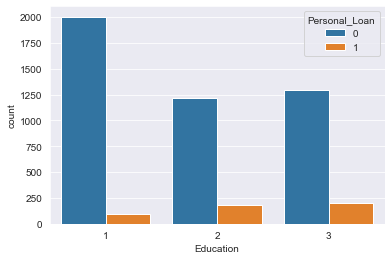

In [14]:
sns.countplot('Education', data=df, hue='Personal_Loan')
# very few undergraduate people have taken personal loan

In [15]:
sns.set_style('darkgrid')

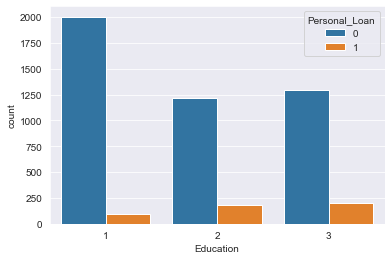

In [16]:
graph = sns.countplot('Education', data=df, hue='Personal_Loan')
# very few undergraduate people have taken personal loan

#### <b>see the rocoeding for the graphs

In [17]:
import zipcodes as zc

In [18]:
zc.list_all()

[{'zip_code': '00501',
  'zip_code_type': 'UNIQUE',
  'active': True,
  'city': 'Holtsville',
  'acceptable_cities': [],
  'unacceptable_cities': ['I R S Service Center'],
  'state': 'NY',
  'county': 'Suffolk County',
  'timezone': 'America/New_York',
  'area_codes': ['631'],
  'world_region': 'NA',
  'country': 'US',
  'lat': '40.8179',
  'long': '-73.0453'},
 {'zip_code': '00544',
  'zip_code_type': 'UNIQUE',
  'active': True,
  'city': 'Holtsville',
  'acceptable_cities': [],
  'unacceptable_cities': ['Irs Service Center'],
  'state': 'NY',
  'county': 'Suffolk County',
  'timezone': 'America/New_York',
  'area_codes': ['631'],
  'world_region': 'NA',
  'country': 'US',
  'lat': '40.7888',
  'long': '-73.0394'},
 {'zip_code': '00601',
  'zip_code_type': 'STANDARD',
  'active': True,
  'city': 'Adjuntas',
  'acceptable_cities': [],
  'unacceptable_cities': ['Colinas Del Gigante',
   'Jard De Adjuntas',
   'Urb San Joaquin'],
  'state': 'PR',
  'county': 'Adjuntas Municipio',
  'time

In [19]:
zc.matching('91101')[0]['county']

'Los Angeles County'

In [22]:
df['County'] = df['ZIPCode'].apply(lambda x: (zc.matching(str(x))[0]['county']) if len(zc.matching(str(x))) else x)

In [27]:
df.County.value_counts()

Los Angeles County        1095
San Diego County           568
Santa Clara County         563
Alameda County             500
Orange County              339
San Francisco County       257
San Mateo County           204
Sacramento County          184
Santa Barbara County       154
Yolo County                130
Monterey County            128
Ventura County             114
San Bernardino County      101
Contra Costa County         85
Santa Cruz County           68
Riverside County            56
Marin County                54
Kern County                 54
San Luis Obispo County      33
Solano County               33
Humboldt County             32
Sonoma County               28
Fresno County               26
Placer County               24
92717                       22
Butte County                19
Shasta County               18
El Dorado County            17
Stanislaus County           15
San Benito County           14
San Joaquin County          13
Mendocino County             8
Siskiyou

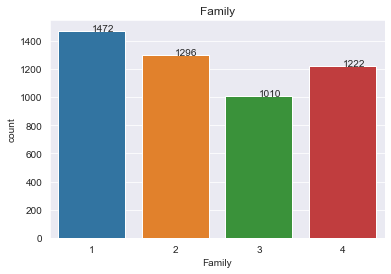

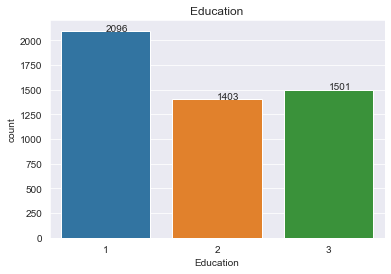

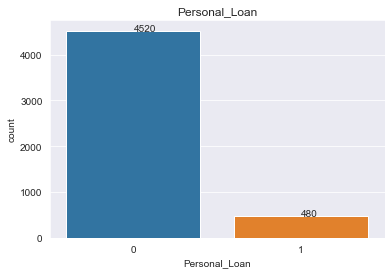

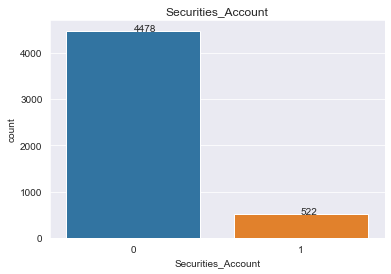

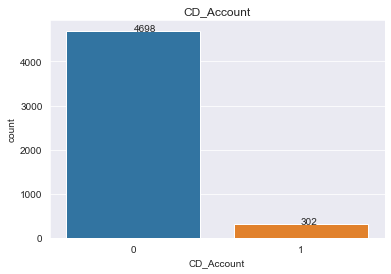

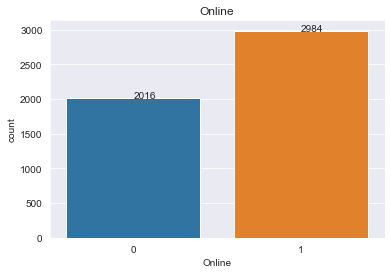

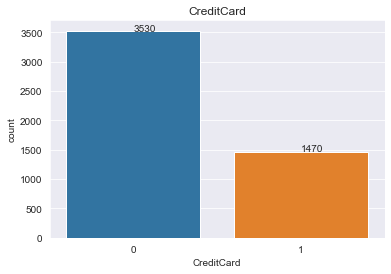

In [28]:
for col in ['Family','Education','Personal_Loan','Securities_Account','CD_Account','Online','CreditCard']:
    f = sns.countplot(x=col,data=df,)
    plt.title(col)
    for i in f.patches:
        x = i.get_x() + i.get_width()/2
        y = i.get_y() + i.get_height()    
        plt.annotate(i.get_height(),(x,y))
    plt.show()

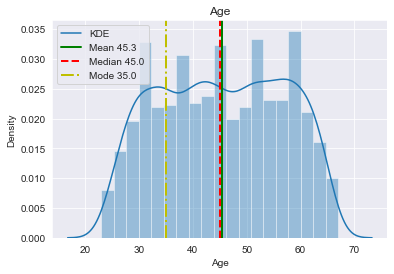

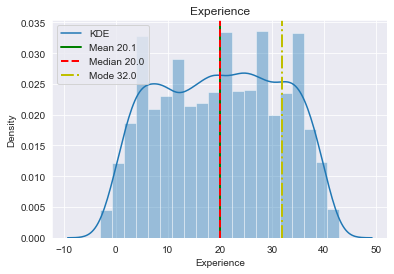

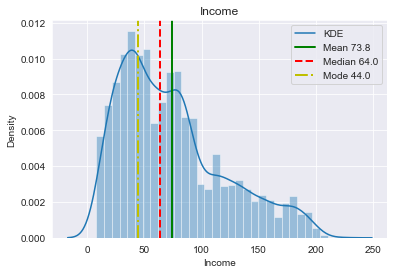

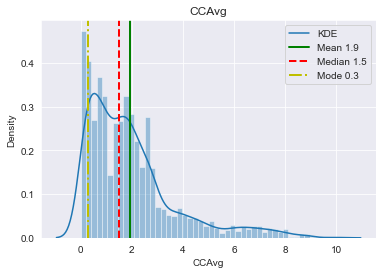

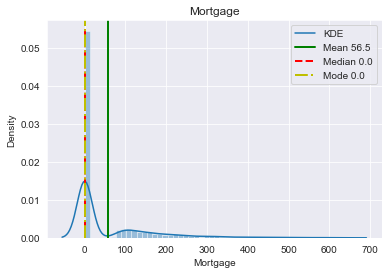

In [29]:
for col in ['Age','Experience','Income','CCAvg','Mortgage']:
    mean = df[col].mean()
    median = df[col].median()
    mode = df[col].mode().values[0]
    #here we have just found the mean and not actually plotted it
    sns.distplot(df[col])
    
    #This - axvline is used to plot line for a paticular value in th graph
    plt.axvline(mean,color='g',ls='-',lw=2)
    plt.axvline(median,color='r',ls='--',lw=2)
    plt.axvline(mode,color='y',ls='-.',lw=2)
    plt.legend({'KDE':'','Mean %.1f'%mean:mean,'Median %.1f'%median:median,'Mode %.1f'%mode:mode,})
    plt.title(col)
    plt.show()
